**REGRESION LINEAL VEHICULOSN**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
dataset1 = pd.read_csv('car data.csv')
dataset2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
dataset3 = pd.read_csv('Car details v3.csv')
dataset4 = pd.read_csv('car details v4.csv')

In [13]:
dataset1.rename(columns={
    'Car_Name': 'name', 'Year': 'year', 'Selling_Price': 'selling_price',
    'Present_Price': 'present_price', 'Kms_Driven': 'km_driven',
    'Fuel_Type': 'fuel', 'Seller_Type': 'seller_type', 'Transmission': 'transmission',
    'Owner': 'owner'}, inplace=True)

dataset2.rename(columns={
    'name': 'name', 'year': 'year', 'selling_price': 'selling_price', 'km_driven': 'km_driven',
    'fuel': 'fuel', 'seller_type': 'seller_type', 'transmission': 'transmission', 'owner': 'owner'}, inplace=True)

dataset3.rename(columns={
    'name': 'name', 'year': 'year', 'selling_price': 'selling_price', 'km_driven': 'km_driven',
    'fuel': 'fuel', 'seller_type': 'seller_type', 'transmission': 'transmission', 'owner': 'owner'}, inplace=True)

dataset4.rename(columns={
    'Make': 'name', 'Year': 'year', 'Price': 'selling_price', 'Kilometer': 'km_driven',
    'Fuel Type': 'fuel', 'Seller Type': 'seller_type', 'Transmission': 'transmission',
    'Owner': 'owner'}, inplace=True)

In [14]:
combined_dataset = pd.concat([dataset1, dataset2, dataset3, dataset4], ignore_index=True)
combined_dataset['selling_price'].fillna(combined_dataset['selling_price'].mean(), inplace=True)
combined_dataset['km_driven'].fillna(combined_dataset['km_driven'].mean(), inplace=True)
combined_dataset['fuel'].fillna(combined_dataset['fuel'].mode()[0], inplace=True)

In [15]:
combined_dataset.drop_duplicates(inplace=True)


In [16]:
combined_dataset['year'] = combined_dataset['year'].astype(int)
combined_dataset['km_driven'] = combined_dataset['km_driven'].astype(int)
combined_dataset['selling_price'] = combined_dataset['selling_price'].astype(float)

In [17]:
print(combined_dataset.describe())
print(combined_dataset.info())
combined_dataset.to_csv('combined_dataset_clean.csv', index=False)

               year  selling_price  present_price     km_driven        seats  \
count  12859.000000   1.285900e+04     299.000000  1.285900e+04  6718.000000   
mean    2013.778365   6.830461e+05       7.541037  6.864570e+04     5.434653   
std        4.167275   1.165888e+06       8.567887  5.565153e+04     0.984230   
min     1983.000000   1.000000e-01       0.320000  0.000000e+00     2.000000   
25%     2011.000000   2.400000e+05       1.200000  3.500000e+04     5.000000   
50%     2014.000000   4.250000e+05       6.100000  6.000000e+04     5.000000   
75%     2017.000000   7.000000e+05       9.840000  9.000000e+04     5.000000   
max     2022.000000   3.500000e+07      92.600000  2.360457e+06    14.000000   

            Length        Width       Height  Seating Capacity  \
count  1995.000000  1995.000000  1995.000000       1995.000000   
mean   4280.860652  1767.991980  1591.735338          5.306266   
std     442.458507   135.265825   136.073956          0.822170   
min    3099.000

      name  year  selling_price  present_price  km_driven    fuel seller_type  \
0     ritz  2014           3.35           5.59      27000  Petrol      Dealer   
1      sx4  2013           4.75           9.54      43000  Diesel      Dealer   
2     ciaz  2017           7.25           9.85       6900  Petrol      Dealer   
3  wagon r  2011           2.85           4.15       5200  Petrol      Dealer   
4    swift  2014           4.60           6.87      42450  Diesel      Dealer   

  transmission owner mileage  ... Color Engine Max Power  Max Torque  \
0       Manual     0     NaN  ...   NaN    NaN       NaN         NaN   
1       Manual     0     NaN  ...   NaN    NaN       NaN         NaN   
2       Manual     0     NaN  ...   NaN    NaN       NaN         NaN   
3       Manual     0     NaN  ...   NaN    NaN       NaN         NaN   
4       Manual     0     NaN  ...   NaN    NaN       NaN         NaN   

  Drivetrain Length Width Height Seating Capacity Fuel Tank Capacity  
0        

C:\Users\proyectos.ingenieria\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\proyectos.ingenieria\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\proyectos.ingenieria\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\proyectos.ingenieria\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

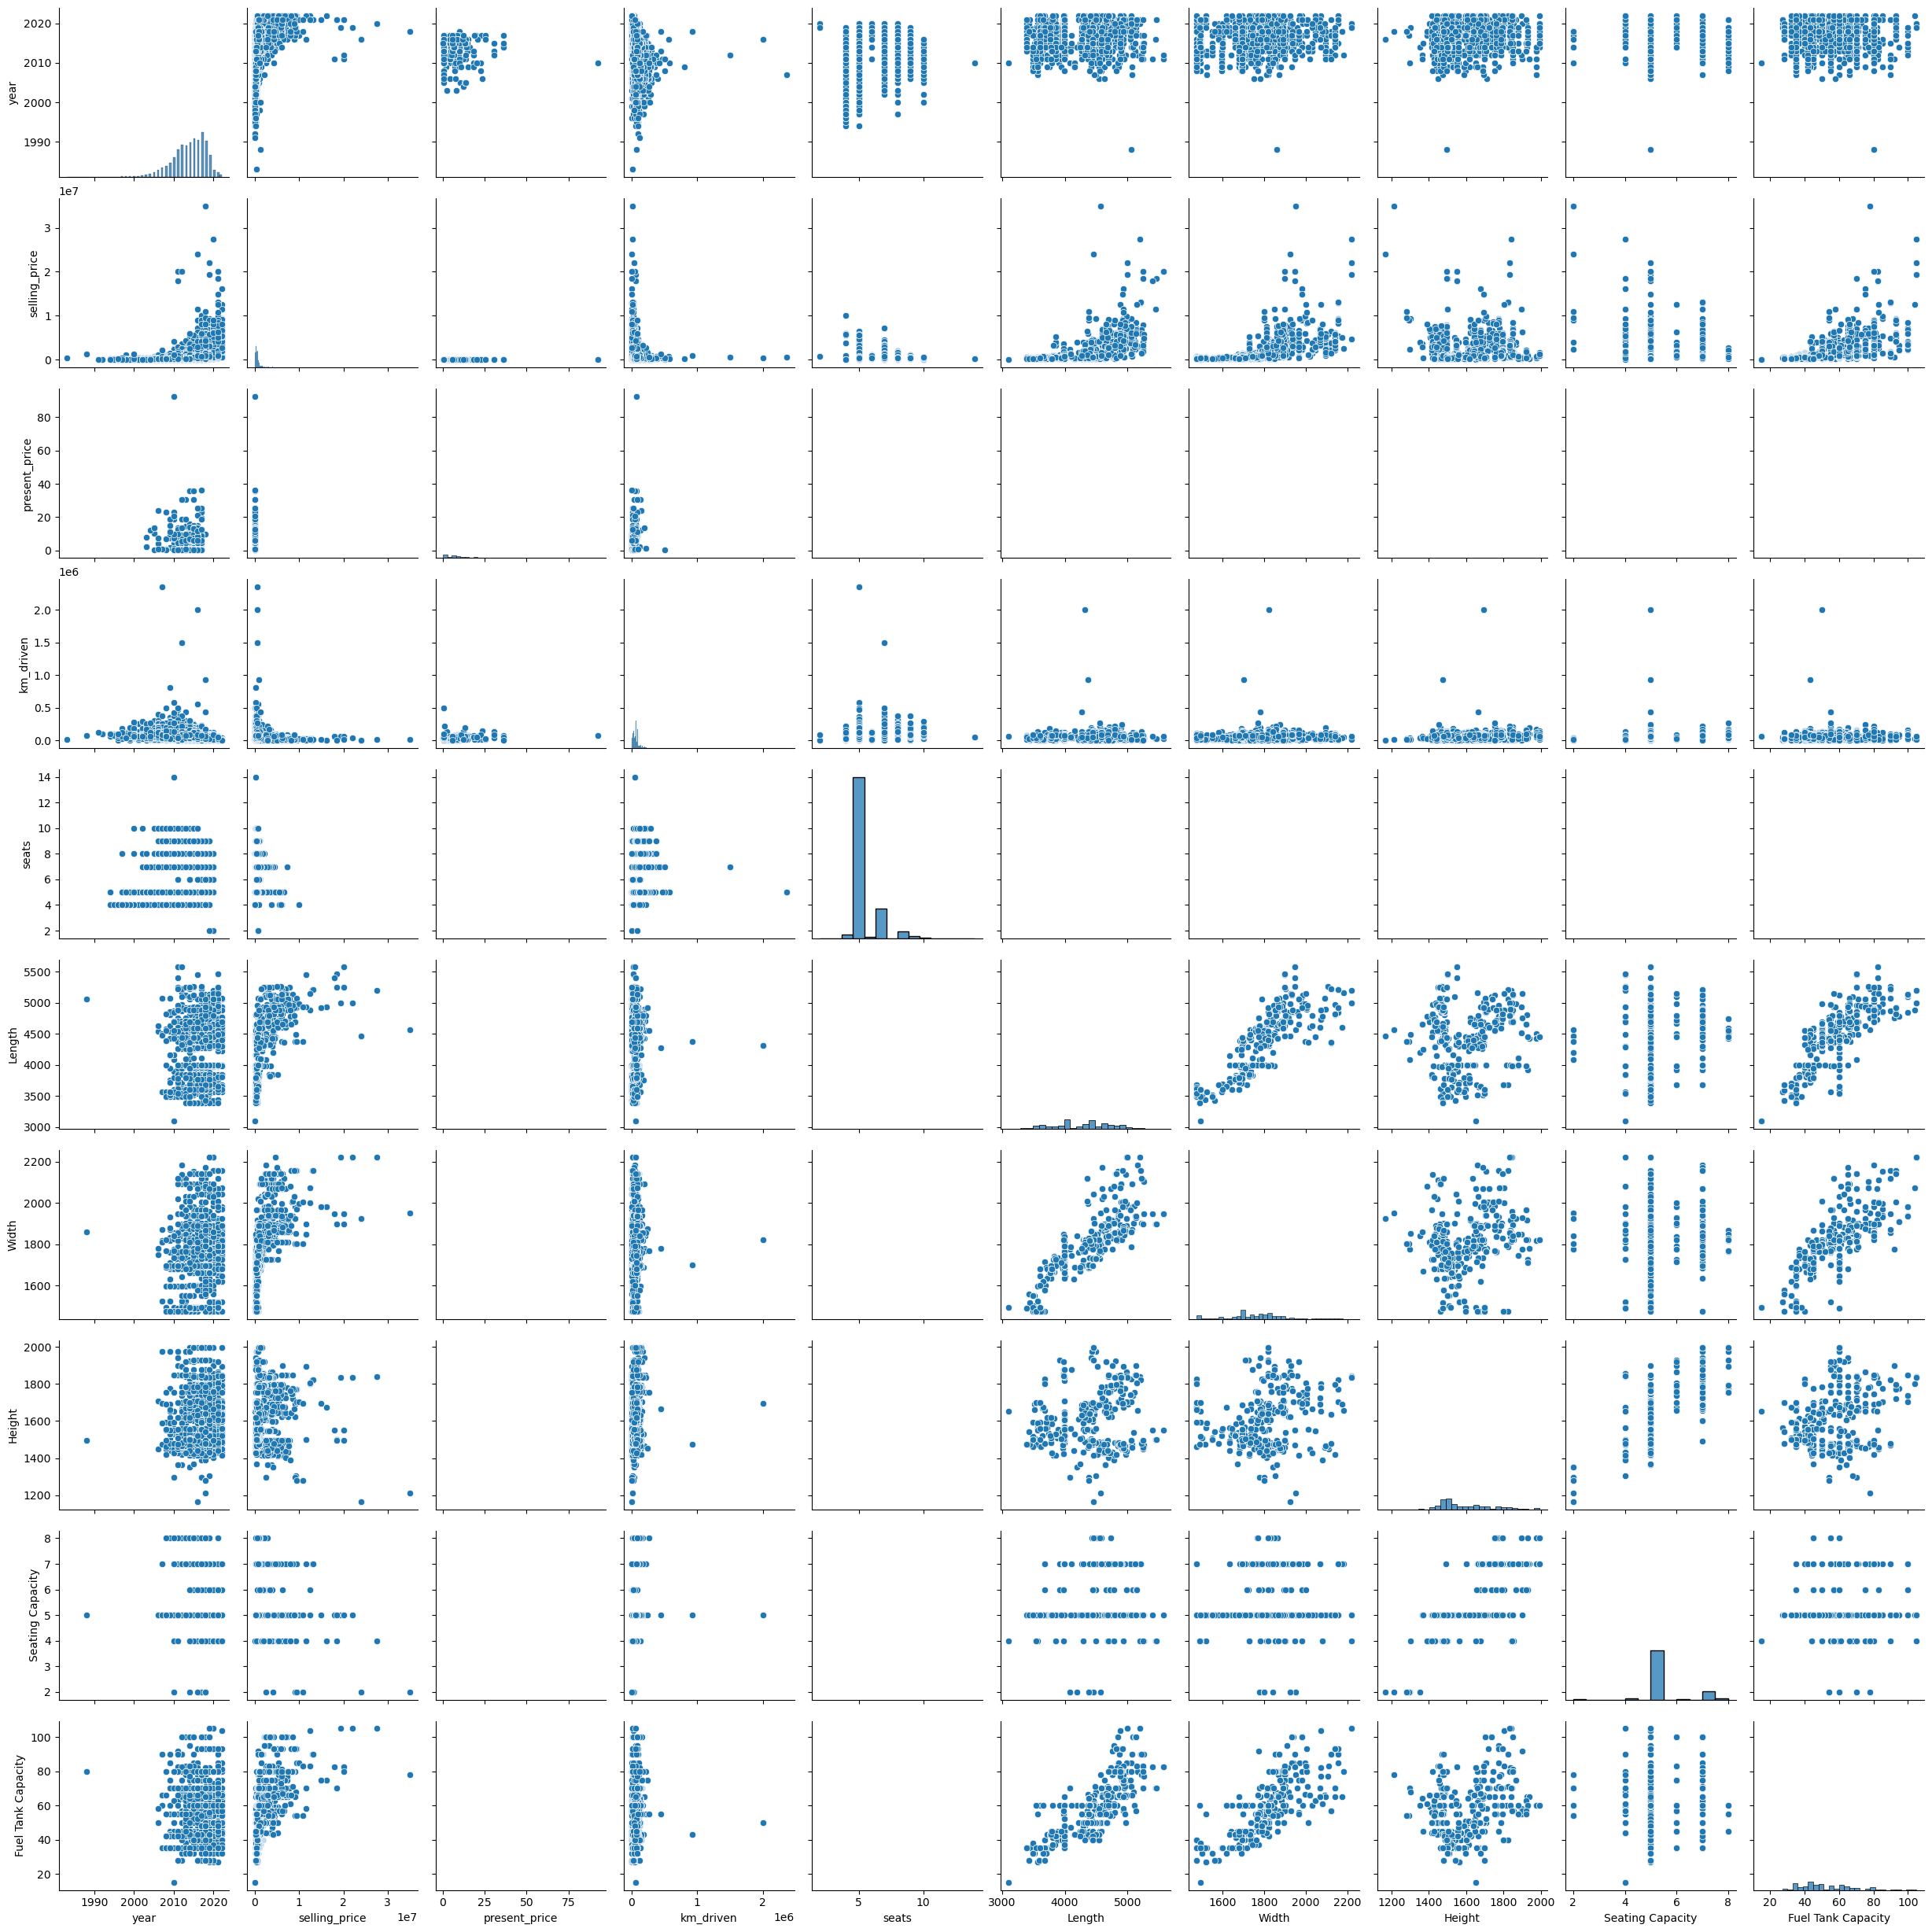

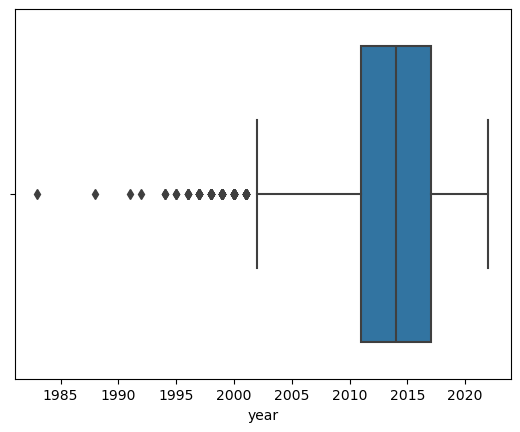

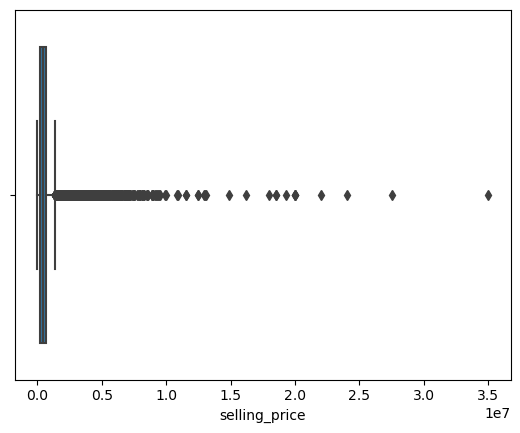

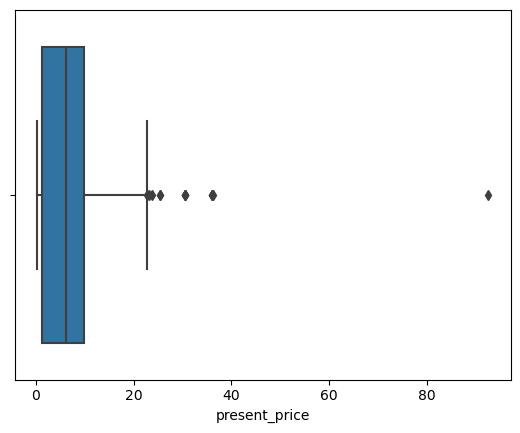

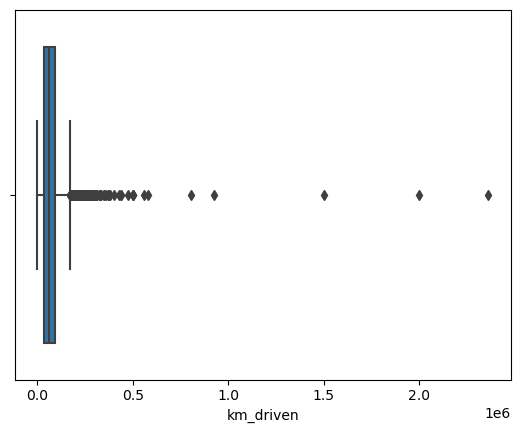

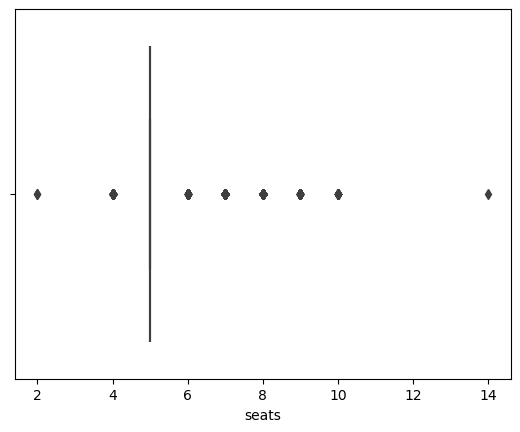

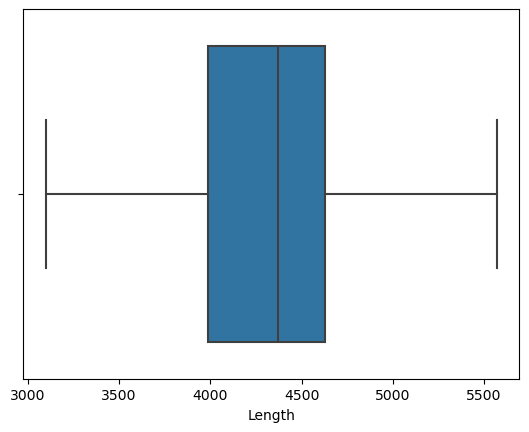

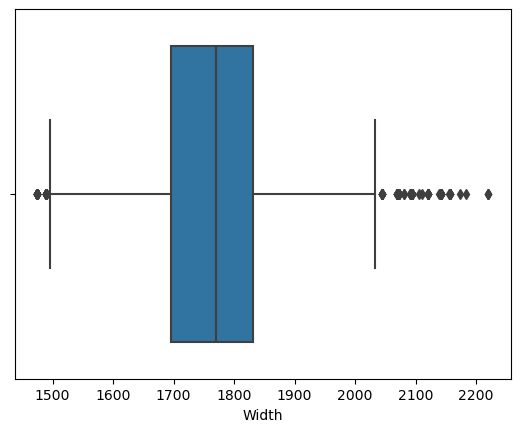

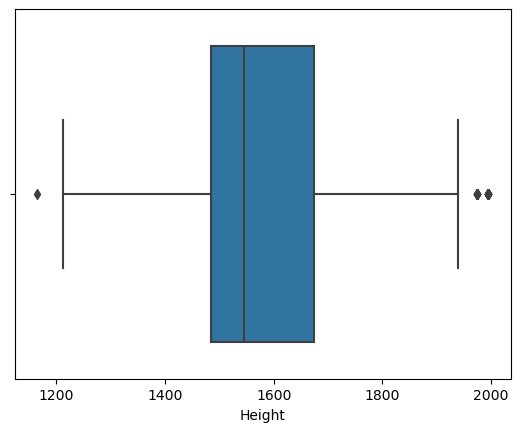

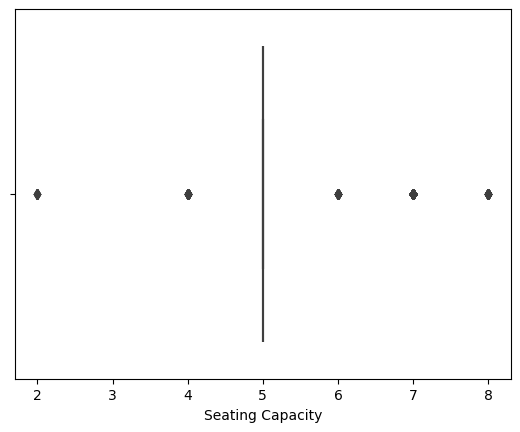

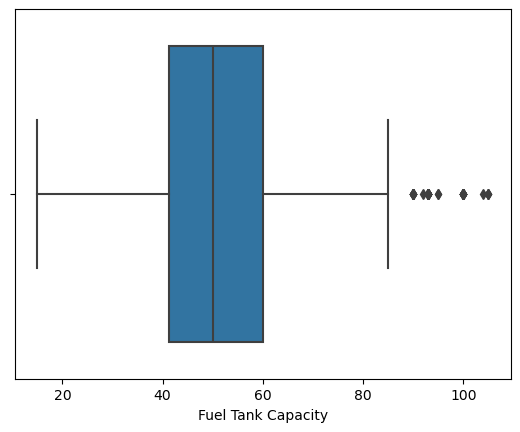

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Carga de datos
data = pd.read_csv('combined_dataset_clean.csv')

# Vista general de los datos
print(data.head())
print(data.describe())

# Gráficos para análisis visual
sns.pairplot(data)
plt.show()

# Diagramas de caja para detectar valores atípicos
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    sns.boxplot(x=data[column])
    plt.show()

In [19]:
#**EJERCICIO PRINCIPAL**

Linear Regression R²: 0.3930514737399845
Linear Regression RMSE: 777752.7063256194
Logistic Regression Accuracy: 0.813893208916537
Logistic Regression Confusion Matrix:
 [[1554  364]
 [ 354 1586]]
Decision Tree R²: 0.023900147133222638
Decision Tree RMSE: 986308.3822082605


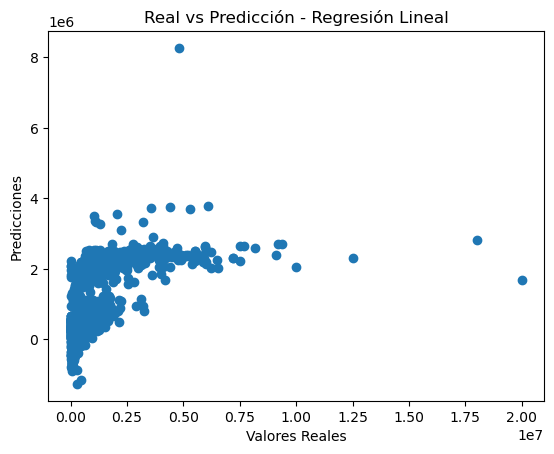

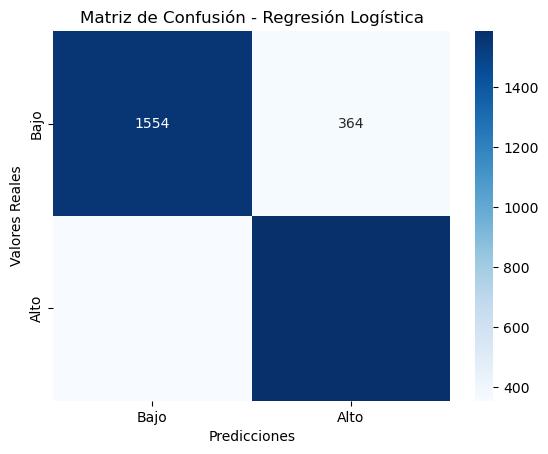

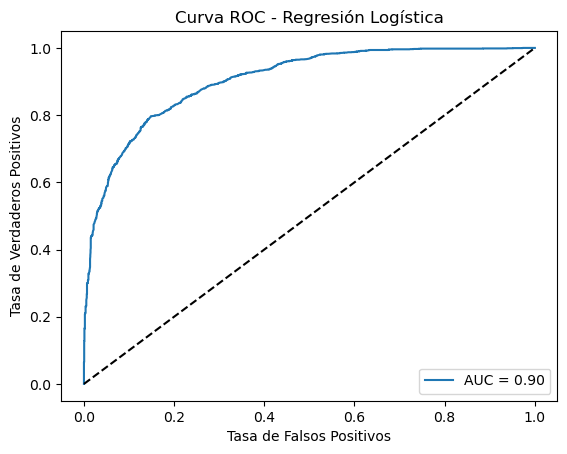

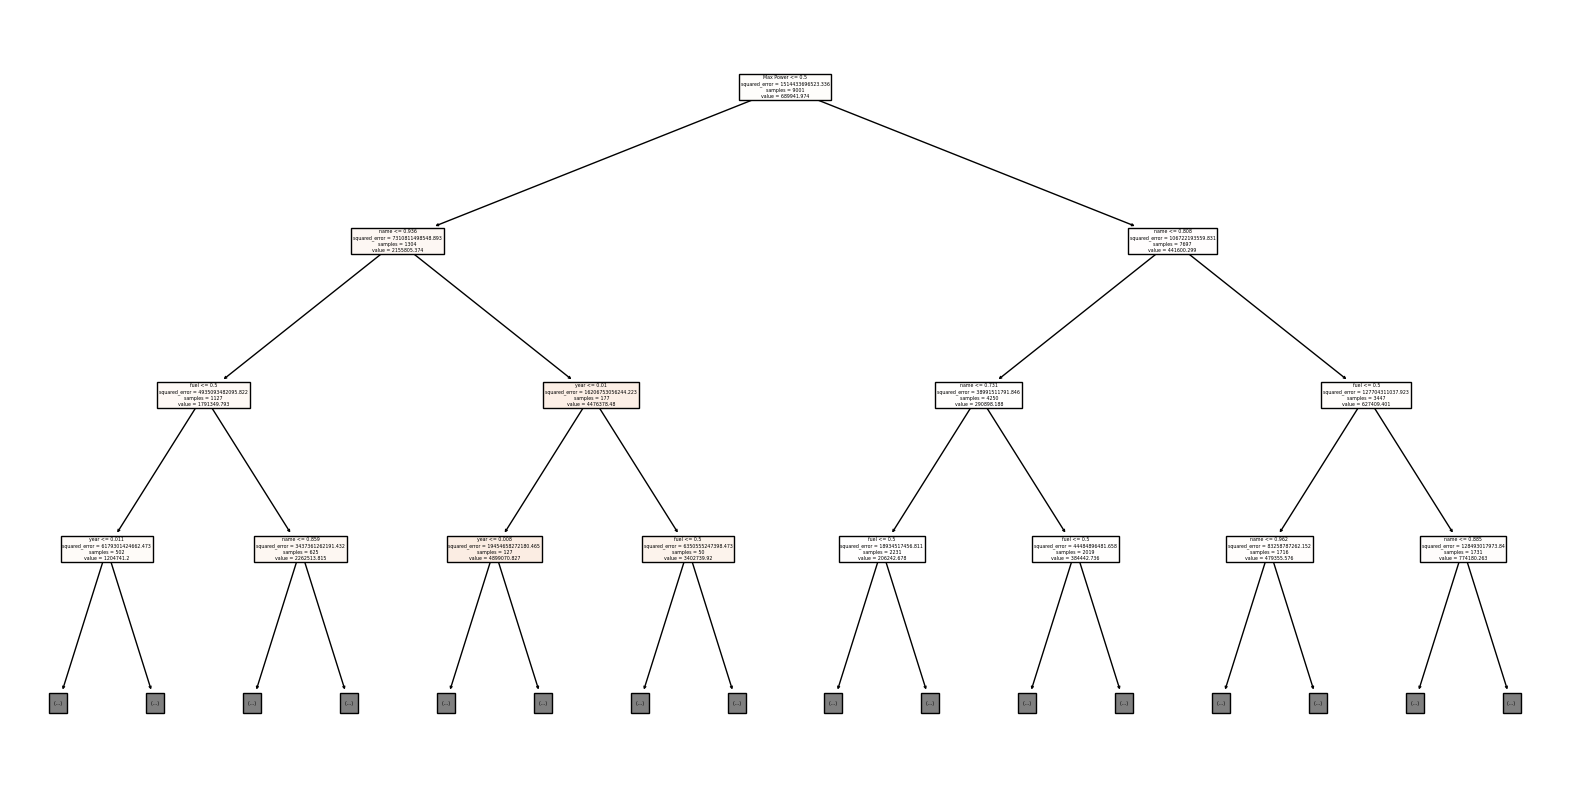

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carga y unión de datasets
dataset1 = pd.read_csv('car data.csv')
dataset2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
dataset3 = pd.read_csv('Car details v3.csv')
dataset4 = pd.read_csv('car details v4.csv')

# NUEVO NOMBRE columnas para estandarización
renames = {
    'Car_Name': 'name', 'Year': 'year', 'Selling_Price': 'selling_price',
    'Present_Price': 'present_price', 'Kms_Driven': 'km_driven',
    'Fuel_Type': 'fuel', 'Seller_Type': 'seller_type', 'Transmission': 'transmission',
    'Owner': 'owner', 'Price': 'selling_price', 'Kilometer': 'km_driven',
    'Fuel Type': 'fuel', 'Seller Type': 'seller_type', 'Make': 'name'
}
for dataset in [dataset1, dataset2, dataset3, dataset4]:
    dataset.rename(columns=renames, inplace=True)

combined_dataset = pd.concat([dataset1, dataset2, dataset3, dataset4], ignore_index=True)
combined_dataset.drop_duplicates(inplace=True)

# oRGANIZA de datos
combined_dataset.fillna({
    'selling_price': combined_dataset['selling_price'].mean(),
    'km_driven': combined_dataset['km_driven'].mean(),
    'fuel': combined_dataset['fuel'].mode()[0]
}, inplace=True)

combined_dataset['year'] = combined_dataset['year'].astype(int)
combined_dataset['km_driven'] = combined_dataset['km_driven'].astype(int)
combined_dataset['selling_price'] = combined_dataset['selling_price'].astype(float)

# Convertir VARIABLE DE STRINGS A FLOAT 
median_price = combined_dataset['selling_price'].median()
combined_dataset['high_price'] = (combined_dataset['selling_price'] > median_price).astype(int)

# aPLICO pIPELINE
numeric_features = ['year', 'km_driven']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_features = ['fuel', 'seller_type', 'transmission']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# ORGANIZA datos
X = combined_dataset.drop(['selling_price', 'high_price'], axis=1)
y = combined_dataset['selling_price']
y_binary = combined_dataset['high_price']

X_preprocessed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_preprocessed, y_binary, test_size=0.3, random_state=42)

# AQUI YA ESTAN LOS MODELOS CODIGO OK
## Reg Lineal
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)

## Reg Loga
model_log = LogisticRegression()
model_log.fit(X_train_log, y_train_log)
y_pred_log = model_log.predict(X_test_log)
y_pred_proba_log = model_log.predict_proba(X_test_log)[:, 1]  # ESTA FALLANDO VALIDARLO

## Árboles de Decisión
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

## vALIDA SI ES v + Lineal
print('Linear Regression R²:', r2_score(y_test, y_pred_lin))
print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred_lin, squared=False))

## vALIDA SI ES v + Log
print('Logistic Regression Accuracy:', accuracy_score(y_test_log, y_pred_log))
print('Logistic Regression Confusion Matrix:\n', confusion_matrix(y_test_log, y_pred_log))

## vALIDA SI TREEE ES SI (NO FUNCIONA )
print('Decision Tree R²:', r2_score(y_test, y_pred_tree))
print('Decision Tree RMSE:', mean_squared_error(y_test, y_pred_tree, squared=False))

# Visualización de resultados de regresión lineal
plt.scatter(y_test, y_pred_lin)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Real vs Predicción - Regresión Lineal')
plt.show()

# regr log
## Matriz de Confusión
conf_mat = confusion_matrix(y_test_log, y_pred_log)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Bajo', 'Alto'], yticklabels=['Bajo', 'Alto'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

##FALSOS POSITIVOS hp ME fALLOROC
fpr, tpr, thresholds = roc_curve(y_test_log, y_pred_proba_log)
auc = roc_auc_score(y_test_log, y_pred_proba_log)
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.show()

# TREES
plt.figure(figsize=(20,10))
plot_tree(model_tree, filled=True, feature_names=X.columns, max_depth=3)
plt.show()